In [58]:
import os
import torch
import numpy as np
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt

In [85]:
class PCA:
    def __init__(self, n_components):
        """
        Parameters
        ----------
        n_components: Number of principal components that the original data should be compressed
            int
        """
        self.components = n_components

    def fit_transform(self, X):
        """
        Performing the standard following steps:
        + Centering our inputs with mean (For each observation, subtract it with its corresponding mean across column)
        + Finding covariance matrix using mean-centered tensor (Cov(X) = 1\n-1 X^T X
        + Finding eigenvalue and eigenvector using provided torch function, i.e.,torch.eig()
        + Sorting eigenvalues in descending order and finding index of the k highest eigenvalues (where k equals to n_components)
        + Using sorted index, retrieve the eigenvectors and construct the projection matrix W
        + Tranforming the original dataset with n columns into PCA components with the reduced dimension, i.e., X' = XW

        Parameters
        ----------
        X: Input tensor with n columns.
            Torch tensor

        Returns
        -------
        Output tensor with reduced principal components
        """
        X_centered = X - torch.mean(X, dim=0)
        covariance_matrix = torch.mm(X_centered.T, X_centered) / (X_centered.shape[0] - 1)
        eigen_values, eigen_vectors = torch.linalg.eigh(covariance_matrix)
        eigen_sorted_index = torch.argsort(eigen_values, descending=True)
        eigen_vectors_sorted = eigen_vectors[:,eigen_sorted_index]
        W = eigen_vectors_sorted[:,0:self.components]
        transformed = torch.mm(X_centered, W) #(torch.mm(W.T, X_centerd.T).T 
        return transformed
    
    def variance_explain(self, X, plot = True):
      """
      Compute the variance explained ratio of each eigenvalue in the top k eigenvalue

      Parameters
      ----------
      X: Input tensor with n columns.
          Torch tensor

      Returns
      -------
      Variance explained ratio
          Torch tensor
      """
      X_centerd = X - torch.mean(X, dim=0)
      covariance_matrix = torch.mm(X_centerd.T, X_centerd) / (X_centerd.shape[0] - 1)
      eigen_values, eigen_vectors = torch.linalg.eigh(covariance_matrix)
      sum_eigen = eigen_values.sum()
      sorted_eigen, _ = eigen_values.sort(descending = True)
      var_explain = sorted_eigen / sum_eigen
      cum_var_explain = torch.cumsum(var_explain, dim = 0)
      if plot:
          plt.bar(range(1, X.size(1) + 1), var_explain, align='center',
          label = 'Individual explained variance')
          plt.step(range(1, X.size(1) + 1), cum_var_explain, where='mid',
          label = 'Cumulative explained variance')
          plt.ylabel('Explained variance ratio')
          plt.xlabel('Principal component index')
          plt.legend(loc='center right')
          plt.tight_layout()
          plt.show()

      return var_explain, cum_var_explain 

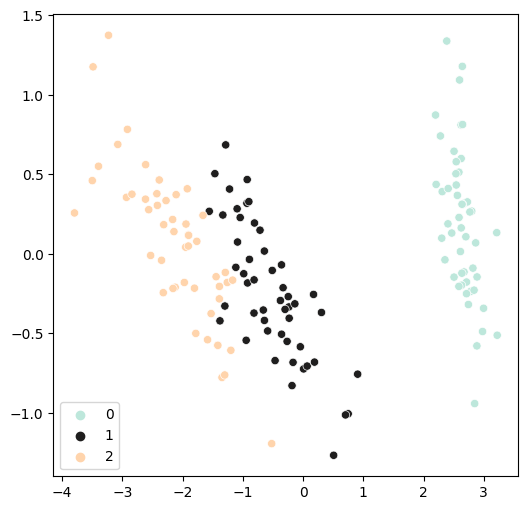

In [86]:
data = load_iris()
X = torch.tensor(data.data,dtype=torch.double)
y = torch.tensor(data.target)
pca = PCA(n_components=2)
pca_vector = pca.fit_transform(X)
plt.figure(figsize=(6, 6))
sns.scatterplot(x=pca_vector[:, 0].numpy(), y=pca_vector[:, 1].numpy(), hue = y.numpy(), palette='icefire')
plt.show()

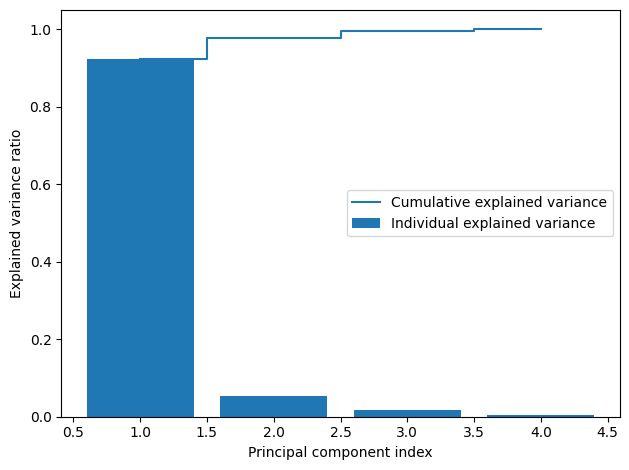

(tensor([0.9246, 0.0531, 0.0171, 0.0052], dtype=torch.float64),
 tensor([0.9246, 0.9777, 0.9948, 1.0000], dtype=torch.float64))

In [87]:
pca.variance_explain(X)

## **Testing functionality**

In [11]:
 X_centered = X - torch.mean(X, dim=0)
 covariance_matrix = torch.mm(X_centered.T, X_centered) / (X_centered.shape[0] - 1)

In [15]:
eigen_values, eigen_vectors = torch.linalg.eigh(covariance_matrix)
print(eigen_values)
print(eigen_vectors)

tensor([0.0238, 0.0782, 0.2427, 4.2282], dtype=torch.float64)
tensor([[ 0.3155,  0.5820,  0.6566, -0.3614],
        [-0.3197, -0.5979,  0.7302,  0.0845],
        [-0.4798, -0.0762, -0.1734, -0.8567],
        [ 0.7537, -0.5458, -0.0755, -0.3583]], dtype=torch.float64)


In [70]:
sorted_eigen, _ = eigen_values.sort(descending = True)

In [71]:
var_explain = sorted_eigen / eigen_values.sum()

In [76]:
var_explain

tensor([0.9246, 0.0531, 0.0171, 0.0052], dtype=torch.float64)

In [77]:
cum_var_explain = torch.cumsum(var_explain, dim = 0)

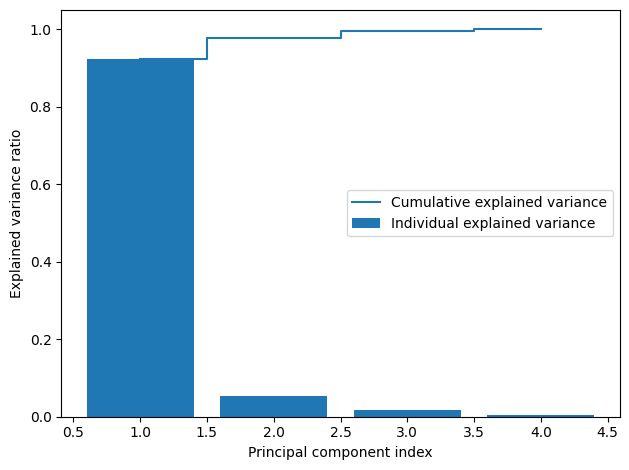

In [81]:
plt.bar(range(1, X.size(1) + 1), var_explain, align='center',
label = 'Individual explained variance')
plt.step(range(1, X.size(1) + 1), cum_var_explain, where='mid',
label = 'Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='center right')
plt.tight_layout()
plt.show()

In [22]:
W = eigen_vectors[:, torch.argsort(eigen_values, descending = True)][:, 0:2]

In [25]:
X_1 = torch.mm(X_centered, W)

In [26]:
X_2 = torch.mm(W.T, X_centered.T).T

In [27]:
assert X_1.size() == X_2.size()